In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#1. Download dataset
#2. Loading the dataset

dt = pd.read_csv('/content/Churn_Modelling.csv') #dataset loaded

In [ ]:
#importing the libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


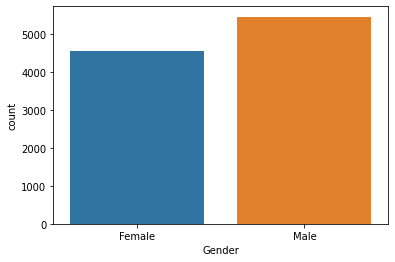

In [ ]:
#3. Perform Univarient analysis

sns.countplot(dt.Gender)

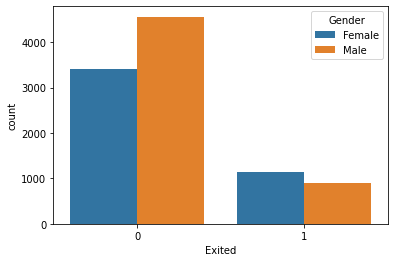

In [ ]:
#Perform bivarient analysis

sns.countplot(data = dt, x = 'Exited', hue = 'Gender')

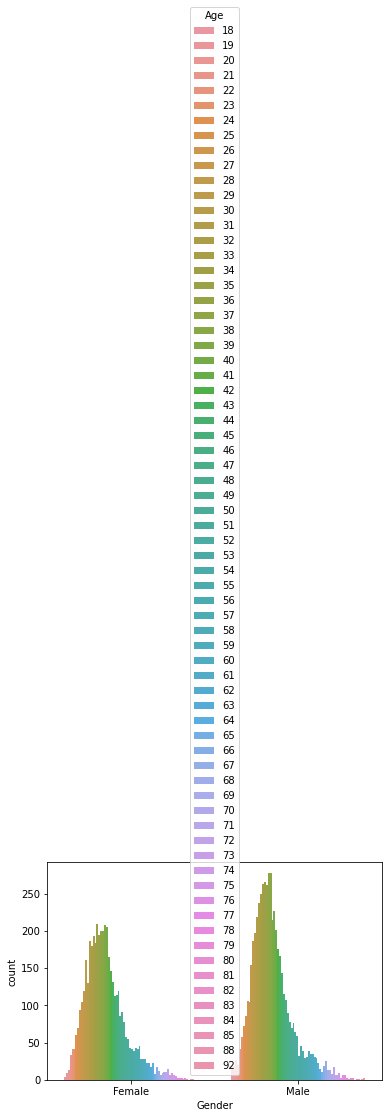

In [ ]:
#Perform multivarient analysis

sns.countplot(data = dt, x = 'Gender', hue = 'Age')

In [ ]:
#4. Perform descriptive satistics on the dataset

dt.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#5. Handle the missing value

dt.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


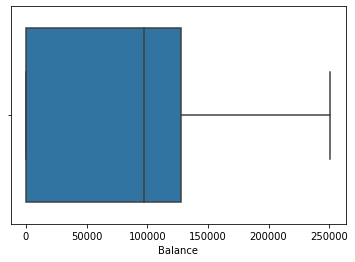

In [ ]:
#6. find the outliners and replace the outliners

sns.boxplot(dt['Balance'])

In [ ]:
#7. Check for categorial column and perform encoding

dt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dt['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
dt['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
dt['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
dt['Surname'] = le.fit_transform(dt['Surname'])

In [ ]:
dt['Gender'] = le.fit_transform(dt['Gender'])

In [ ]:
dt['Geography'] = le.fit_transform(dt['Geography'])

In [ ]:
#8. Split the data into dependent and independent variables.

x = dt.iloc[:,0:13].values #independent variable

In [ ]:
y = dt.iloc[:,13:14].values #dependent variable

In [ ]:
#9. Sacle the independent variables

x

array([[1.0000000e+00, 1.5634602e+07, 1.1150000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.0000000e+00, 1.5647311e+07, 1.1770000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [3.0000000e+00, 1.5619304e+07, 2.0400000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [9.9980000e+03, 1.5584532e+07, 1.5700000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [9.9990000e+03, 1.5682355e+07, 2.3450000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+04, 1.5628319e+07, 2.7510000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
#10. Split the data into training and testing

from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
xtrain

array([[7.6820000e+03, 1.5633608e+07, 2.5900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 5.5796830e+04],
       [9.0320000e+03, 1.5742323e+07, 1.6400000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.9823020e+04],
       [3.6920000e+03, 1.5760244e+07, 1.3040000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.3848580e+04],
       ...,
       [3.2650000e+03, 1.5574372e+07, 1.2020000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [9.8460000e+03, 1.5664035e+07, 2.1220000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [2.7330000e+03, 1.5592816e+07, 2.6780000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [ ]:
ytrain

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])